# Convolutional Neural Network
from the TensorFlow tutorial

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sess = tf.Session()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

In [3]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

x_image = tf.reshape(x, [-1,28,28,1])

#first layer
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])


h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
#print 'conv1:',h_conv1.get_shape()
#print 'h_pool1:',h_pool1.get_shape()

#second layer
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
#print 'conv2:',h_conv2.get_shape()
#print 'h_pool2:',h_pool2.get_shape()

#third layer: continuous
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
#print 'h_fc1:',h_fc1.get_shape()



keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#fourth layer countinuous
W_fc2 = weight_variable([1024, 256])
b_fc2 = bias_variable([256])
h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
#print 'h_fc2:',h_fc2.get_shape()
h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

#fifth layer: continuous
W_fc3 = weight_variable([256, 128])
b_fc3 = bias_variable([128])
h_fc3 = tf.matmul(h_fc2_drop, W_fc3) + b_fc3
#print 'h_fc3:',h_fc3.get_shape()
h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

#sixth layer continuous
W_fc4 = weight_variable([128, 10])
b_fc4 = bias_variable([10])
h_fc4 = tf.matmul(h_fc3_drop, W_fc4) + b_fc4
#print 'h_fc4:',h_fc4.get_shape()

#softmax
y_conv=tf.nn.softmax(h_fc4)
cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [4]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
sess.run(tf.global_variables_initializer())
finalRepresentations = []
for i in range(1000):
    batch = mnist.train.next_batch(50)
    if (i%100 == 0):
        train_accuracy = accuracy.eval(session=sess,feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        finalRepresentations.append(h_fc2.eval(session=sess, feed_dict={x:mnist.test.images, keep_prob:1.0}))

    train_step.run(session=sess,feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.75})

print("test accuracy %g"%accuracy.eval(session=sess,feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.1
step 100, training accuracy 0.78
step 200, training accuracy 0.88
step 300, training accuracy 0.92
step 400, training accuracy 0.88
step 500, training accuracy 0.86
step 600, training accuracy 0.94
step 700, training accuracy 0.92
step 800, training accuracy 0.94
step 900, training accuracy 0.98
test accuracy 0.9609


# Visualize First Layer of Filters

(5, 5, 1, 32)


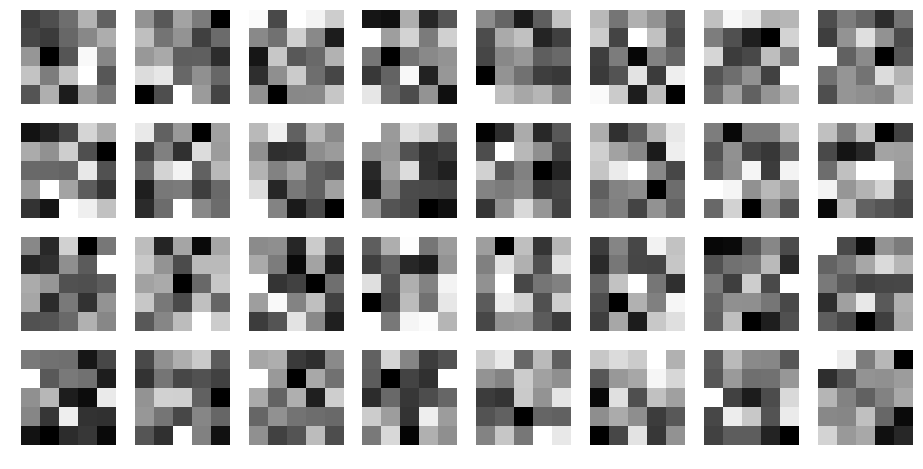

In [5]:
import matplotlib as plt
from matplotlib import pyplot as plt
%matplotlib inline

#first layer kernels
W_conv1s = W_conv1.eval(session=sess) 
fig = plt.figure(figsize=(16,8))
print(W_conv1s.shape)
for i in range(W_conv1s.shape[3]):
    plt.subplot(4,8,i+1)
    plt.imshow(W_conv1s[:,:,0,i],cmap=plt.cm.gray);
    plt.axis('off')

(5, 5, 32, 64)


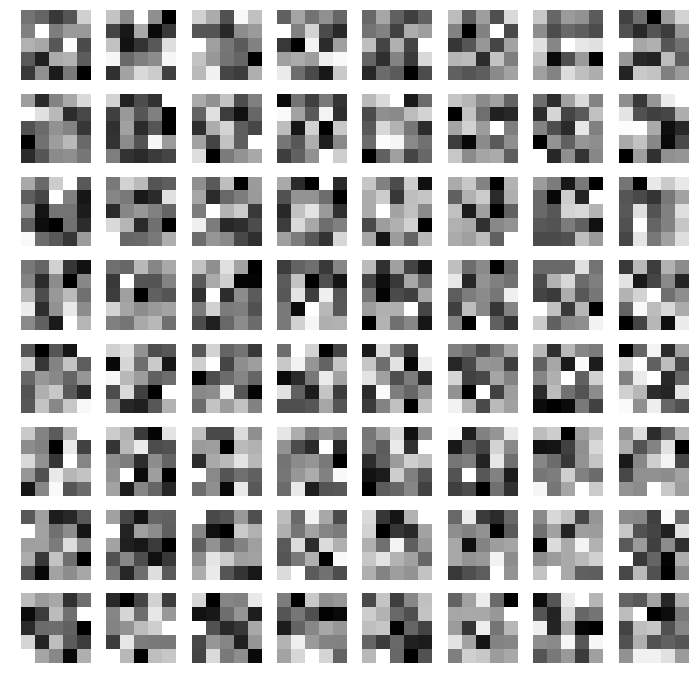

In [6]:
## Second Layer Kernels 
W_conv2s = W_conv2.eval(session=sess) 
fig = plt.figure(figsize=(12,12))
print(W_conv2s.shape)
for i in range(W_conv2s.shape[3]):
    plt.subplot(8,8,i+1)
    plt.imshow(W_conv2s[:,:,3,i],cmap=plt.cm.gray);
    plt.axis('off')

# visualize representation space

In [7]:
import numpy as np
from sklearn.manifold import TSNE

#labels
testY = np.argmax(mnist.test.labels,1)
#variables TSNE
K = 9
plot_only = 10000
labels = testY[0:plot_only]
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [ ]:
#check how to do this
#compute layer 1 conv
hidden_layer1 = h_pool1.eval(session=sess, feed_dict={x:mnist.test.images[0:plot_only], keep_prob:1.0})
h_pool1_flat = tf.reshape(hidden_layer1, [-1, 14*14*64])
weights1 = tsne.fit_transform(h_pool1_flat[0:plot_only,:])
print("layer 1 done")
#compute layer 2 conv
hidden_layer2 = h_pool2_flat.eval(session=sess, feed_dict={x:mnist.test.images[0:plot_only], keep_prob:1.0})
h_pool2_flat = tf.reshape(hidden_layer2, [:, 7*7*64])
weights2 = tsne.fit_transform(h_pool2_flat[0:plot_only,:])
print("layer 2 done")

In [24]:
#on raw data
weights0 = tsne.fit_transform(mnist.test.images[0:plot_only])
print("layer 0 done")
#compute layer 3 continuous 1024
hidden_layer3 = h_fc1.eval(session=sess, feed_dict={x:mnist.test.images[0:plot_only], keep_prob:1.0})
weights3 = tsne.fit_transform(hidden_layer3[0:plot_only,:])
print("layer 3 done")
#compute layer 4 continuous 256
hidden_layer4 = h_fc2.eval(session=sess, feed_dict={x:mnist.test.images[0:plot_only], keep_prob:1.0})
weights4 = tsne.fit_transform(hidden_layer4[0:plot_only,:])
print("layer 4 done")
#compute layer 5 continuous 128
hidden_layer5 = h_fc3.eval(session=sess, feed_dict={x:mnist.test.images[0:plot_only], keep_prob:1.0})
weights5 = tsne.fit_transform(hidden_layer5[0:plot_only,:])
print("layer 5 done")
#compute layer 6 continuous 10
hidden_layer6 = h_fc4.eval(session=sess, feed_dict={x:mnist.test.images[0:plot_only], keep_prob:1.0})
weights6 = tsne.fit_transform(hidden_layer6[0:plot_only,:])
print("layer 6 done")
#compute the final layer
#compute layer 6 continuous 10
hidden_layer7 = y_conv.eval(session=sess, feed_dict={x:mnist.test.images[0:plot_only], keep_prob:1.0})
weights7 = tsne.fit_transform(hidden_layer7[0:plot_only,:])
print("LAST layer done!")

layer 0 done
layer 3 done
layer 4 done
layer 5 done
layer 6 done
LAST layer done!


(-12.950856862034691,
 12.890042450144524,
 -12.569978613499538,
 12.09364362827281)

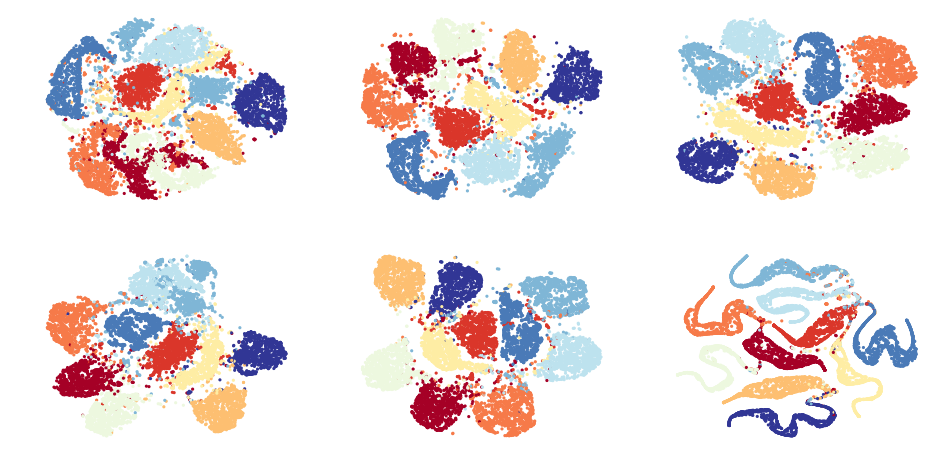

In [27]:
#now fit them
fig=plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(weights0[:,0],weights0[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)))
plt.axis("off")
#plt.subplot(4,4,2)
#plt.scatter(weights1[:,0],weights1[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)))
#plt.axis("off")
#plt.subplot(4,4,3)
#plt.scatter(weights2[:,0],weights2[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)))
#plt.axis("off")
plt.subplot(2,3,2)
plt.scatter(weights3[:,0],weights3[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)))
plt.axis("off")
plt.subplot(2,3,3)
plt.scatter(weights4[:,0],weights4[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)))
plt.axis("off")
plt.subplot(2,3,4)
plt.scatter(weights5[:,0],weights5[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)))
plt.axis("off")
plt.subplot(2,3,5)
plt.scatter(weights6[:,0],weights6[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)))
plt.axis("off")
plt.subplot(2,3,6)
plt.scatter(weights7[:,0],weights7[:,1],s=10,edgecolor='None',marker='o',alpha=1.,c=plt.cm.RdYlBu_r(np.asarray(labels)/float(K)))
plt.axis("off")